# Neural Nets: Convolution

In this lab we try to build a model to detect handwritten digits. This lab should introduce you in the use of keras and should enable you to build and train your own CNNs.

In [1]:
# imports
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# nn
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

# image manipulation
import cv2

%matplotlib inline

Using TensorFlow backend.


First of all, we load our data set that is devided into a training and a testing set.

In [2]:
# load digit dataset with training and test images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In this data set we have 10 different classes. Each data point in this data set is an image of resoution 28x28 and shows a handwirtten digit.

In [3]:
nb_classes = 10
# dimension
img_rows, img_cols = x_train[0].shape
print('number of rows: ' + str(img_rows) + '; number of cols: ' + str(img_cols))

number of rows: 28; number of cols: 28


To get a better feeling for the data we take a look at the first 10 instances.

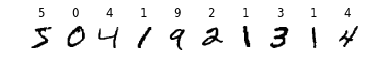

number of train images: 60000


In [4]:
# The data consists of images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset. For all images, we know which digit they represent: it is given in the 'target' of
# the dataset.
num_to_show = 10
for i in range(num_to_show):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(2, num_to_show, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(str(label))
plt.show()

# print some statistics
print('number of train images: ' + str(len(x_train)))

<b>Exercise 1:</b>  
Create a histogram showing the class distribution.

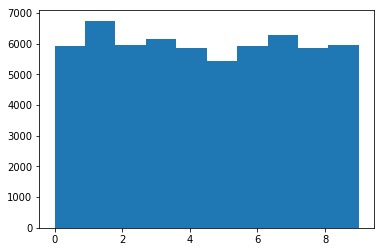

In [8]:
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.show()

We have to reshape the training and test data so that a model created by keras can handle it. We do so by just adding an extra dimension.

In [9]:
# transform data set
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

<b>Simple Neural Model</b>

Our first simple model is a neural net with one hidden layer consisting of 512 hidden units and a ReLU activation function. To prevent overfitting a dropout layer is added after that. The input for this net is an image that is converted to a flat vector in the first layer. Please have a look at the architecture and try to understand the structure of this neural net.

In [10]:
def getSimpleModel():
    # simple model with dense layers
    simpleModel = Sequential()
    simpleModel.add(Flatten(input_shape=input_shape))
    simpleModel.add(Dense(512, activation='relu'))
    simpleModel.add(Dropout(0.2))
    simpleModel.add(Dense(nb_classes, activation='softmax'))

    simpleModel.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return simpleModel

simpleModel = getSimpleModel()
simpleModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


<b>Simple Convolutional Neural Net</b>

The second neural net we are using is a convolutional neural net. This network consists of a convolutional layer a max pooling layer and a dense layer in the end. 

In [11]:
# simple cnn
def getCNNModel():
    nb_filters_one = 32
    nb_filters_two = 64
    nb_conv = 3
    nb_pool = 2
    dense_size = 128
    cnnModel = Sequential()
    cnnModel.add(Conv2D(nb_filters_one, kernel_size=(nb_conv, nb_conv),
                     activation='relu',
                     input_shape=input_shape))
    cnnModel.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    cnnModel.add(Dropout(0.25))
    cnnModel.add(Flatten())
    cnnModel.add(Dense(dense_size, activation='relu'))
    cnnModel.add(Dropout(0.5))
    cnnModel.add(Dense(nb_classes, activation='softmax'))

    cnnModel.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return cnnModel

cnnModel = getCNNModel()
cnnModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

<b>Exercise 2:</b>  
Compare the two different network architectures. What can you say about the number of trainable parameters? Which neural net will probably work better?

<b>Answer:</b>
number of parameter in cnn is higher. and cnn will probably work better

To use the integer label for the neural net training we have to encode them in a one-hot-encoding way.

In [12]:
oneHotLabelTrain = np_utils.to_categorical(y_train, nb_classes)
oneHotLabelTest  = np_utils.to_categorical(y_test,  nb_classes)

Now we can train both models and save the training and testing accuracies for the different epochs in a callback. This can really take some time.

In [13]:
batch_size = 128
simpleModel = getSimpleModel()
learnHistSimple = simpleModel.fit(x_train,oneHotLabelTrain,validation_data=(x_test,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=10)
cnnModel = getCNNModel()
learnHistCNN    = cnnModel.fit(x_train,oneHotLabelTrain,validation_data=(x_test,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 10.9606 - acc: 0.3188 - val_loss: 10.1658 - val_acc: 0.3685
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 9.5791 - acc: 0.4050 - val_loss: 8.9485 - val_acc: 0.4446
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 9.1016 - acc: 0.4347 - val_loss: 7.7266 - val_acc: 0.5202
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 8.4317 - acc: 0.4760 - val_loss: 8.8877 - val_acc: 0.4476
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 8.5809 - acc: 0.4673 - val_loss: 8.4924 - val_acc: 0.4730
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 8.8736 - acc: 0.4492 - val_loss: 7.8537 - val_acc: 0.5124
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 8.4045 - acc: 0.4781 - val_loss: 7.5134 - val_acc: 0.5337
Epoch 8/10
60000/60000 [==============================] - 2

In [19]:
numEpochs=10
print(learnHistSimple.history)
print(learnHistCNN.history)
print(np.arange(1,numEpochs+1,1).shape)
print(np.array(learnHistSimple.history['loss']).shape)

{'val_loss': [10.165841923522949, 8.9484768737792972, 7.7265671630859378, 8.8876604003906259, 8.4924159248352051, 7.8536785530090336, 7.5133672431945797, 7.4152666931152345, 7.7290151306152346, 8.0226354614257804], 'loss': [10.960649611409504, 9.5791019770304366, 9.1016060984293627, 8.4316896458943678, 8.5808642639160162, 8.873576729329427, 8.404466668701172, 7.7948286499023434, 7.8939134445190433, 7.753490309143066], 'val_acc': [0.36849999999999999, 0.4446, 0.5202, 0.4476, 0.47299999999999998, 0.51239999999999997, 0.53369999999999995, 0.53990000000000005, 0.52000000000000002, 0.50190000000000001], 'acc': [0.31878333334922793, 0.40504999999205271, 0.43470000003178916, 0.47594999999999998, 0.46731666663487753, 0.44918333334922789, 0.47809999996821084, 0.51608333330154421, 0.50978333331743875, 0.51856666665077211]}
{'val_loss': [5.433027980041504, 1.7982489078521728, 1.5098832149505614, 1.4928376655578612, 2.0649414991378783, 2.1519334468841551, 2.2909077377319336, 1.765976700592041, 1.7

<b>Exercise 3:</b>  
Plot the learning curves for the two neural nets, showing the training and testing loss over the number of epochs. What are the learning curves telling you?

Loss


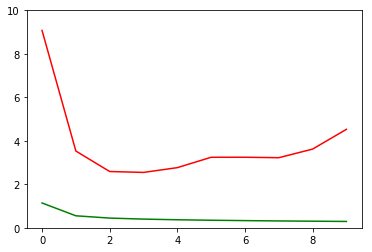

Validation Loss


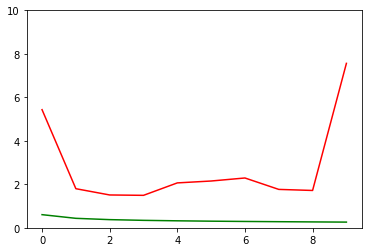

In [30]:
print("Loss")
plt.plot(learnHistSimple.history['loss'], color='green')
plt.plot(learnHistCNN.history['loss'], color='red')
plt.ylim([0, 10])
plt.show()
print("Validation Loss")
plt.plot(learnHistSimple.history['val_loss'], color='green')
plt.plot(learnHistCNN.history['val_loss'], color='red')
plt.ylim([0, 10])
plt.show()

So the results for the neural net (simple model) are much worse than the results for the CNN.

<b>Excercise 4:</b>

Normalize the input data so that all values are between 0 and 1. After that, retrain the simple model. Are the results better? Can you explain the results?

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 1.1141 - acc: 0.7322 - val_loss: 0.5956 - val_acc: 0.8675
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.5447 - acc: 0.8599 - val_loss: 0.4311 - val_acc: 0.8916
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.4433 - acc: 0.8804 - val_loss: 0.3710 - val_acc: 0.9011
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.3951 - acc: 0.8921 - val_loss: 0.3377 - val_acc: 0.9089
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.3656 - acc: 0.8978 - val_loss: 0.3150 - val_acc: 0.9141
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.3419 - acc: 0.9042 - val_loss: 0.2984 - val_acc: 0.9188
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.3271 - acc: 0.9078 - val_loss: 0.2855 - val_acc: 0.9215
Epoch 8/10
60000/60000 [==============================] - 2s 

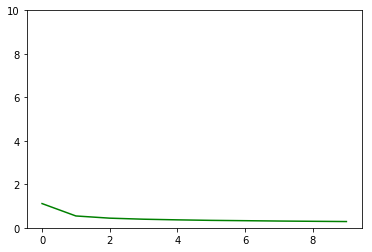

Validation Loss


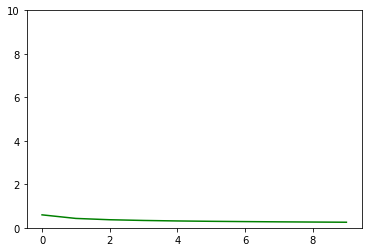

In [31]:
x_train_rescaled = x_train / 255
x_test_rescaled = x_test / 255

# retrain model
batch_size = 128
simpleModel = getSimpleModel()
learnHistSimple = simpleModel.fit(x_train_rescaled,oneHotLabelTrain,validation_data=(x_test_rescaled,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=10)
print("Loss")
plt.plot(learnHistSimple.history['loss'], color='green')
plt.ylim([0, 10])
plt.show()
print("Validation Loss")
plt.plot(learnHistSimple.history['val_loss'], color='green')
plt.ylim([0, 10])
plt.show()

<b>Excercise 5:</b>
    
Write a function that randomly places the digits from the input data on a 2-dimensional image of size 28x28. Do this by firstly resizing the image to the size 14x14 and than placing this digit on a grid of 28x28. After that the data set should look like shown in the image above.

<img src="files/non-centered.png",width=600,height=600>

<b>Hint</b>: Maybe the function cv2.resize(...) could be helpful.

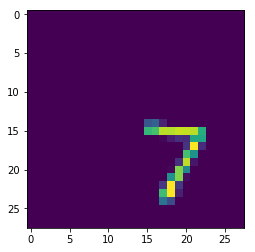

In [67]:
from random import randint
def add_random_noise(inputData):
    out_data = np.zeros(inputData.shape)
    for index, image in enumerate(inputData):
        small_img = cv2.resize(image, (14, 14))
        offset_x, offset_y = randint(0, 14), randint(0, 14)
        out_data[index, offset_x:offset_x+14, offset_y:offset_y+14, 0] = small_img
    return out_data

plt.imshow(add_random_noise(x_test_rescaled)[0, :, :, 0])

Now we can have a look at the new data set of non-centered digits.

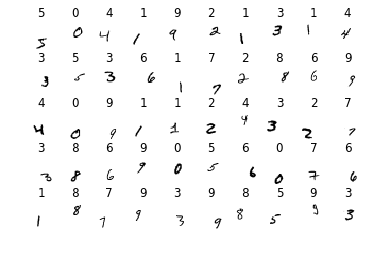

In [68]:
x_train_non_centered = add_random_noise(x_train)
x_test_non_centered = add_random_noise(x_test)

for i in range(50):
    image = x_train_non_centered[i]
    image = image.reshape([img_rows,img_cols])
    label = y_train[i]
    plt.subplot(5, 10, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)
plt.show()


# scale data
x_train_non_centered /= 255.
x_test_non_centered /= 255.

if K.image_data_format() == 'channels_first':
    x_train_non_centered = x_train_non_centered.reshape(x_train_non_centered.shape[0], 1, img_rows, img_cols)
    x_test_non_centered = x_test_non_centered.reshape(x_test_non_centered.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_non_centered = x_train_non_centered.reshape(x_train_non_centered.shape[0], img_rows, img_cols, 1)
    x_test_non_centered = x_test_non_centered.reshape(x_test_non_centered.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


<b>Excercise 6:</b>
    
Train the simple nn and the cnn on this new data set for 10 epochs and compare the trainng and testing results with each other. What conclusions can you draw?

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 2.2957 - acc: 0.1209 - val_loss: 2.2801 - val_acc: 0.1468
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 2.2722 - acc: 0.1550 - val_loss: 2.2580 - val_acc: 0.1877
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 2.2493 - acc: 0.1917 - val_loss: 2.2359 - val_acc: 0.2156
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 2.2257 - acc: 0.2190 - val_loss: 2.2132 - val_acc: 0.2370
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 2.2027 - acc: 0.2382 - val_loss: 2.1889 - val_acc: 0.2547
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 2.1768 - acc: 0.2529 - val_loss: 2.1635 - val_acc: 0.2651
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 2.1518 - acc: 0.2634 - val_loss: 2.1372 - val_acc: 0.2746
Epoch 8/10
60000/60000 [==============================] - 2s 

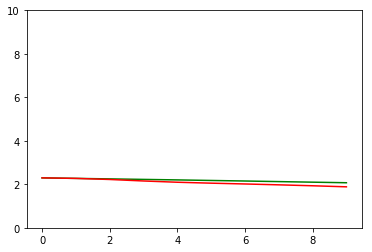

Validation Loss


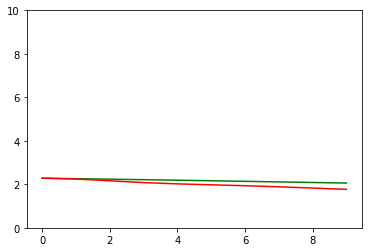

In [70]:
batch_size = 128
simpleModel = getSimpleModel()
cnnModel = getCNNModel()

learnHistSimple = simpleModel.fit(x_train_non_centered,oneHotLabelTrain,validation_data=(x_test_non_centered,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=10)
learnHistCNN    = cnnModel.fit(x_train_non_centered,oneHotLabelTrain,validation_data=(x_test_non_centered,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=10)

print("Loss")
plt.plot(learnHistSimple.history['loss'], color='green')
plt.plot(learnHistCNN.history['loss'], color='red')
plt.ylim([0, 10])
plt.show()
print("Validation Loss")
plt.plot(learnHistSimple.history['val_loss'], color='green')
plt.plot(learnHistCNN.history['val_loss'], color='red')
plt.ylim([0, 10])
plt.show()

<b>Additional Excercise</b>

Try to build a model that is able to get better classification results on the non-centered data set.

In [73]:
def getBiggerCNNModel():
    nb_filters_one = 32
    nb_filters_two = 64
    nb_conv = 3
    nb_pool = 2
    dense_size = 128
    cnnModel = Sequential()
    cnnModel.add(Conv2D(nb_filters_one, kernel_size=(nb_conv, nb_conv),
                     activation='relu',
                     input_shape=input_shape))
    cnnModel.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    cnnModel.add(Dropout(0.25))
    cnnModel.add(Conv2D(nb_filters_one, kernel_size=(nb_conv, nb_conv), activation='relu'))
    cnnModel.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    cnnModel.add(Dropout(0.25))
    cnnModel.add(Flatten())
    cnnModel.add(Dense(dense_size, activation='relu'))
    cnnModel.add(Dropout(0.5))
    cnnModel.add(Dense(nb_classes, activation='softmax'))

    cnnModel.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return cnnModel

batch_size = 128
cnnBigModel = getBiggerCNNModel()

learnHistBigCNN    = cnnBigModel.fit(x_train_non_centered,oneHotLabelTrain,validation_data=(x_test_non_centered,oneHotLabelTest),
                                  batch_size=batch_size,
                                  epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s - loss: 2.3031 - acc: 0.1130 - val_loss: 2.2962 - val_acc: 0.1679
Epoch 2/20
60000/60000 [==============================] - 19s - loss: 2.2958 - acc: 0.1372 - val_loss: 2.2898 - val_acc: 0.1861
Epoch 3/20
60000/60000 [==============================] - 19s - loss: 2.2891 - acc: 0.1548 - val_loss: 2.2792 - val_acc: 0.1977
Epoch 4/20
60000/60000 [==============================] - 20s - loss: 2.2775 - acc: 0.1681 - val_loss: 2.2597 - val_acc: 0.1970
Epoch 5/20
60000/60000 [==============================] - 20s - loss: 2.2537 - acc: 0.1818 - val_loss: 2.2180 - val_acc: 0.2111
Epoch 6/20
60000/60000 [==============================] - 20s - loss: 2.2080 - acc: 0.1938 - val_loss: 2.1423 - val_acc: 0.2282
Epoch 7/20
60000/60000 [==============================] - 20s - loss: 2.1375 - acc: 0.2113 - val_loss: 2.0432 - val_acc: 0.2570
Epoch 8/20
60000/60000 [==============================

Loss


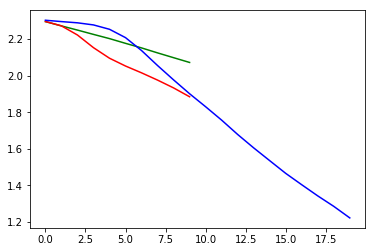

Validation Loss


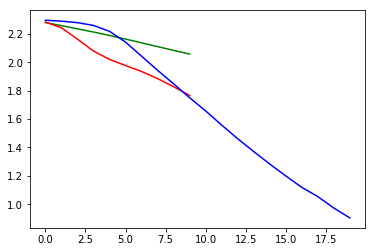

In [74]:
print("Loss")
plt.plot(learnHistSimple.history['loss'], color='green')
plt.plot(learnHistCNN.history['loss'], color='red')
plt.plot(learnHistBigCNN.history['loss'], color='blue')
plt.show()
print("Validation Loss")
plt.plot(learnHistSimple.history['val_loss'], color='green')
plt.plot(learnHistCNN.history['val_loss'], color='red')
plt.plot(learnHistBigCNN.history['val_loss'], color='blue')
plt.show()